In [ ]:
pip install torch-lucent

     |████████████████████████████████| 46 kB 2.1 MB/s 
     |████████████████████████████████| 225 kB 10.5 MB/s 
     |████████████████████████████████| 297 kB 39.9 MB/s 
     |████████████████████████████████| 297 kB 49.3 MB/s 
     |████████████████████████████████| 296 kB 40.1 MB/s 
     |████████████████████████████████| 296 kB 47.3 MB/s 
     |████████████████████████████████| 280 kB 36.0 MB/s 
     |████████████████████████████████| 280 kB 22.2 MB/s 
     |████████████████████████████████| 280 kB 45.8 MB/s 
     |████████████████████████████████| 280 kB 46.1 MB/s 
     |████████████████████████████████| 279 kB 34.7 MB/s 
     |████████████████████████████████| 279 kB 45.6 MB/s 
     |████████████████████████████████| 272 kB 43.0 MB/s 
     |████████████████████████████████| 272 kB 44.6 MB/s 
     |████████████████████████████████| 272 kB 45.6 MB/s 
     |████████████████████████████████| 270 kB 43.9 MB/s 
     |████████████████████████████████| 270 kB 39.3 MB/s 
     |██████████

In [ ]:
import torch

from lucent.optvis import render

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc3 = nn.Linear(394384, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc3(x))
        return x


net = Net()

In [ ]:
net.load_state_dict(torch.load('fourcities_net.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
net.to(device).eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc3): Linear(in_features=394384, out_features=10, bias=True)
)

  0%|          | 0/512 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/lucent/optvis/render.py:104: UserWarning: Some layers could not be computed because the size of the image is not big enough. It is fine, as long as the noncomputed layers are not used in the objective function(exception details: 'mat1 and mat2 shapes cannot be multiplied (1x44944 and 394384x10)')
  "Some layers could not be computed because the size of the "
100%|██████████| 512/512 [00:23<00:00, 22.19it/s]



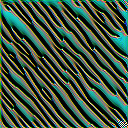

In [ ]:
_ = render.render_vis(net, "conv2:11", show_inline=True)